# **토근화 ?**

**TensorFlow를 이용하여 자연어를 처리하는 방법(토큰화)을 알아보다!**

토큰화 테스트 - 단어 기반 인코딩

* 'Tokenizer'는 문장으로부터 단어를 토큰화하고 숫자에 대응시키는 딕셔너리를 사용할 수 있도록 함

* 'fit_on_texts()' 메서드는 문자 데이터를 입력받아서 리스트의 형태로 변환함

* 'tokenizer의 word_index' 속성은 단어와 숫자의 키-값 쌍을 포함하는 딕셔너리를 반환함

* TensorFlow를 이용해서 두 문장 'I love my dog'과 'I love my cat'을 단어 기반으로 인코딩하는 방법

* 느낌표, 마침표와 같은 구두점은 인코딩에 영향을 주지 않음

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
  'I love my dog',
  'I love my cat'
]

tokenizer = Tokenizer(num_words=100) # num_words 파라미터를 이용하여 단어의 개수를 제한
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}


In [ ]:
sentences = [
  'I love my dog',
  'I love my cat',
  'You love my dog!'
]

tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


토큰화 테스트 - 텍스트를 시퀀스로 변환

* 'texts_to_sequences()' 메서드를 이용하여 단어들을 시퀀스의 형태로 변환함

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
  'I love my dog',
  'I love my cat',
  'You love my dog!',
  'Do you think my dog is amazing?'
]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

print('word_index =', word_index)
print('sequences =', sequences)

word_index = {'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
sequences = [[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


In [ ]:
test_sentences = [
  'i really love my dog',
  'my dog loves my friend'
]

# 미리 토큰화되어 있지 않은 'really', 'loves'와 같은 단어들은 숫자들의 시퀀스에 포함되지 않음
test_sequences = tokenizer.texts_to_sequences(test_sentences)
print(test_sequences)

[[4, 2, 1, 3], [1, 3, 1]]


토큰화 테스트 - 토큰화되지 않은 단어 처리

* 자연어 처리에 있어서 많은 단어들을 학습하게 되고, 미리 토큰화되어 있지 않은 단어들을 만나게 됨

* 이때 이러한 단어들을 무시하기보다 oov_token 인자를 사용해서 특수한 값으로 처리할 수 있음

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(oov_token="OOV") # Tokenizer(oov_token="OOV") = 토큰화되지 않은 단어 처리

tokenizer.fit_on_texts(sentences) # 토큰화
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

test_sentences = [
    'i really love my dog',
    'my dog loves my friend'
]

test_sequences = tokenizer.texts_to_sequences(test_sentences)
print(test_sequences)
print(word_index)

[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]
{'OOV': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}


# **네이버 영화 리뷰 - 토큰화**

구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


한글 출력을 위해서 나눔 폰트 설치

In [ ]:
# 설치 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


Mecab(오픈 소스 형태소 분석 엔진) 설치

In [ ]:
# colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-09-26 05:40:02--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c2:513, 2406:da00:ff00::22c3:9b0a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=3nDpSceTDU1bwwv%2Fzg1JhDs58JM%3D&Expires=16326

Mecab 테스트

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

text1 = '네이버 영화 리뷰 토근화를 해보자.'
my_morphs1 = mecab.morphs(text1)
print(my_morphs1)

text2 = '내일은동아리모임이있다.'
my_morphs2 = mecab.morphs(text2)
print(my_morphs2)

['네이버', '영화', '리뷰', '토근', '화', '를', '해', '보', '자', '.']
['내일', '은', '동아리', '모임', '이', '있', '다', '.']


전처리 데이터 불러오기

In [ ]:
import pandas as pd

train_data = pd.read_csv("/content/drive/MyDrive/ml_data/NaverMovieReview/train_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/ml_data/NaverMovieReview/test_data.csv")

In [ ]:
train_data[:5]

,Unnamed: 0,id,리뷰,분류
0,0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,2,10265843,너무재밓었다그래서보는것을추천한다,0
3,3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [ ]:
test_data[:5]

,Unnamed: 0,id,리뷰,분류
0,0,6270596,굳 ㅋ,1
1,2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
2,3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
3,4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
4,5,7898805,음악이 주가 된 최고의 음악영화,1


토큰화

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

# 불용어
stopwords = ["도", "는", "다", "의", "가", "이", "은", "한", "에", "하", "고", "을", "를", "인", "듯", "과", "와", "네", "들", "듯", "지", "임", "게"]

# 토큰화
train_data["토큰화"] = train_data["리뷰"].apply(mecab.morphs) # 형태소 분석
train_data["토큰화"] = train_data["토큰화"].apply(lambda x:[item for item in x if item not in stopwords]) # 불용어 처리

# 토큰화
test_data["토큰화"] = test_data["리뷰"].apply(mecab.morphs) # 형태소 분석
test_data["토큰화"] = test_data["토큰화"].apply(lambda x:[item for item in x if item not in stopwords]) # 불용어 처리

In [ ]:
train_data[:5]

,Unnamed: 0,id,리뷰,분류,토큰화
0,0,9976970,아 더빙 진짜 짜증나네요 목소리,0,"[아, 더, 빙, 진짜, 짜증, 나, 네요, 목소리]"
1,1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1,"[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍, 않, 구나]"
2,2,10265843,너무재밓었다그래서보는것을추천한다,0,"[너무, 재, 밓었다그래서보는것을추천한다]"
3,3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0,"[교도소, 이야기, 구먼, 솔직히, 재미, 없, 평점, 조정]"
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1,"[사이몬페그, 익살, 스런, 연기, 돋보였, 던, 영화, 스파이더맨, 에서, 늙, ..."


In [ ]:
test_data[:5]

,Unnamed: 0,id,리뷰,분류,토큰화
0,0,6270596,굳 ㅋ,1,"[굳, ㅋ]"
1,2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0,"[뭐, 야, 평점, 나쁘, 진, 않, 지만, 점, 짜리, 더더욱, 아니, 잖아]"
2,3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0,"[지루, 않, 은데, 완전, 막장, 돈, 주, 보, 기]"
3,4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0,"[만, 아니, 었, 어도, 별, 다섯, 개, 줬, 텐데, 왜, 로, 나와서, 제, ..."
4,5,7898805,음악이 주가 된 최고의 음악영화,1,"[음악, 주, 된, 최고, 음악, 영화]"


긍정 리뷰의 평균 길이

긍정 리뷰의 평균 길이 : 12.051793925709722
부정 리뷰의 평균 길이 : 12.49731399592657


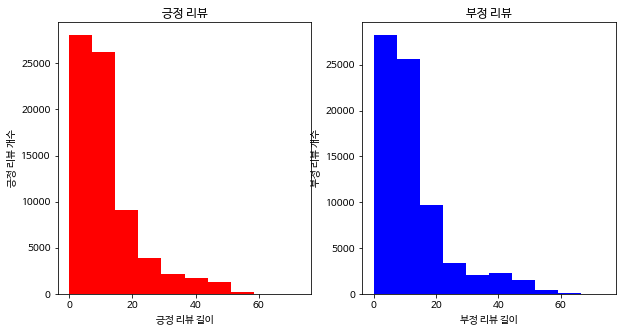

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family = 'NanumBarunGothic')  

pos_len = train_data[train_data["분류"] == 1]["토큰화"].map(lambda x:len(x))
print("긍정 리뷰의 평균 길이 :", np.mean(pos_len))
neg_len = train_data[train_data["분류"] == 0]["토큰화"].map(lambda x:len(x))
print("부정 리뷰의 평균 길이 :", np.mean(neg_len))

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(pos_len, color = "red")
ax1.set_title("긍정 리뷰")
ax1.set_xlabel("긍정 리뷰 길이")
ax1.set_ylabel("긍정 리뷰 개수")

ax2.hist(neg_len, color = "blue")
ax2.set_title("부정 리뷰")
ax2.set_xlabel("부정 리뷰 길이")
ax2.set_ylabel("부정 리뷰 개수")
plt.show()

토근화 dataset

In [ ]:
x_train_tokenized = train_data["토큰화"].values
y_train_tokenized = train_data["분류"].values
x_test_tokenized = test_data["토큰화"].values
y_test_tokenized = test_data["분류"].values

In [ ]:
x_train_tokenized[:5]

array([list(['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리']),
       list(['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍', '않', '구나']),
       list(['너무', '재', '밓었다그래서보는것을추천한다']),
       list(['교도소', '이야기', '구먼', '솔직히', '재미', '없', '평점', '조정']),
       list(['사이몬페그', '익살', '스런', '연기', '돋보였', '던', '영화', '스파이더맨', '에서', '늙', '어', '보이', '기', '만', '했', '던', '커스틴', '던스트', '너무나', '이뻐', '보였'])],
      dtype=object)

In [ ]:
y_train_tokenized[:5]

array([0, 1, 0, 0, 1])

토근화 dataset 저장

In [ ]:
np.save("/content/drive/MyDrive/ml_data/NaverMovieReview/x_train_tokenized.npy", x_train_tokenized, allow_pickle=True)
np.save("/content/drive/MyDrive/ml_data/NaverMovieReview/y_train_tokenized.npy", y_train_tokenized)
np.save("/content/drive/MyDrive/ml_data/NaverMovieReview/x_test_tokenized.npy", x_test_tokenized, allow_pickle=True)
np.save("/content/drive/MyDrive/ml_data/NaverMovieReview/y_test_tokenized.npy", y_test_tokenized)